In [1]:
import pandas as pd
from pathlib import Path

from posydon.popsyn.binarypopulation import BinaryPopulation
from posydon.binary_evol.binarystar import BinaryStar
from posydon.binary_evol.singlestar import SingleStar
from posydon.popsyn.synthetic_population import Population
from posydon.popsyn.synthetic_population import PopulationRunner
import astropy.units as u

import os
import shutil
from posydon.config import PATH_TO_POSYDON

from POSYDONHRDiagramModule import HR_Diagram

pip install --upgrade "git+https://github.com/PiersonLip/Posydon_HR_Graphing_Script.git@main"


srun -A b1094 -p ciera-std -N 1 --time=04:00:00 --ntasks-per-node=1 --mem=8G --pty bash -l

cd /home/bku2126/b1095/bku2126/UCXBInvestigation/Project/Analysis

conda activate posydon_env_v2.2

hostname

module load python-anaconda3/2019.10

jupyter notebook --port=3232 --no-browser

ssh -L 3232:localhost:3232 bku2126@quest.northwestern.edu ssh -N -L 3232:localhost:3232 qnode0231

In [3]:
HR_Diagram

<function POSYDONHRDiagramModule.HR_Diagram(df, df_name, history=True, init_or_final='final', path='', Star=2, variable='S1_mass', var_name='default', LogVar=False, title='default', saveLoc='', saveGraph=False, Star_Radius=True, fileName='Default', showGraph=True, palette='Default', style='default', dpi=200, ylimit=False, minR=1.5, maxR=6.5, referenceStar=False, referenceStarName='Reference Star', referenceStarRange=False, exampleLum=0, exampleTemp=0, exampleTempMin=0, exampleTempMax=0, exampleLumMin=0, exampleLumMax=0, grapher='plt')>

In [4]:
loadedpop = Population(r'/home/bku2126/b1095/bku2126/UCXBInvestigation/Project/Grids/v2_ucxb/1e+00_Zsun_population.h5')

In [5]:
cols = ['time', 'step_names', 'state', 'event', 'S1_state', 'S2_state', 'S1_mass', 'S2_mass', 'orbital_period']
finCols = [
    'orbital_period_f',
    'eccentricity_f',
    'state_f',

    'S2_state_f',
    'S2_mass_f',
    'S2_log_R_f',
    'S2_log_L_f',

    'S1_state_f',
    'S1_mass_f',
    'S1_log_R_f',
    'S1_log_L_f'

 ]

initCols = [
    'orbital_period_i',
    'eccentricity_i',
    'state_i',

    'S2_state_i',
    'S2_mass_i',
    'S2_log_R_i',

    'S1_state_i',
    'S1_mass_i',
    'S1_log_R_i'
 ]

In [6]:
XrB_Logic_Oneline = "((S2_state_f == 'BH') | (S2_state_f == 'NS')) & ((S1_state_f != 'BH') & (S1_state_f != 'NS')) | ((S1_state_f == 'BH') | (S1_state_f == 'NS')) & ((S2_state_f != 'BH') & (S2_state_f != 'NS')) & ((state_f == 'initial_RLOF') | (state_f == 'RLO2')) "

XrB_Logic_History = "((S2_state == 'BH') | (S2_state == 'NS')) & ((S1_state != 'BH') & (S1_state != 'NS')) | ((S1_state == 'BH') | (S1_state == 'NS')) & ((S2_state != 'BH') & (S2_state != 'NS')) & ((state == 'initial_RLOF') | (state == 'RLO2') | (state == 'detached')) "

srun -A b1094 -p ciera-std -t 00:10:00 --mem=16G --pty /bin/bash


In [7]:
XrBsHistory = loadedpop.history.select(where=XrB_Logic_History)

In [8]:
XrBsHistory_end = XrBsHistory[XrBsHistory['event'] =='END']

In [9]:
XrBsHistory_end = XrBsHistory_end[XrBsHistory_end['state'] != 'merged']
XrBsHistory_end = XrBsHistory_end[XrBsHistory_end['state'] != 'disrupted']
XrBsHistory_end = XrBsHistory_end[XrBsHistory_end['state'] != 'detached']


In [10]:
XrBsHistory_end

,state,event,time,orbital_period,eccentricity,rl_relative_overflow_1,rl_relative_overflow_2,lg_mtransfer_rate,mass_transfer_case,step_names,...,S2_surface_n14,S2_surface_o16,S2_surf_avg_omega,S2_surf_avg_omega_div_omega_crit,S2_spin,S2_conv_env_top_mass,S2_conv_env_bot_mass,S2_envelope_binding_energy,S2_total_mass_h1,S2_total_mass_he4
binary_index,,,,,,,,,,,,,,,,,,,,,
5,initial_RLOF,END,1.499148e+07,2.293637,0.867468,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000165,0.854609,18.232629,6.649645,6.649645,-4.093491e+49,4.519788,2.035505
78,initial_RLOF,END,2.114177e+07,3.261803,0.787740,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000116,0.735573,16.077885,8.698465,8.698465,-5.396722e+49,5.461555,3.114047
155,initial_RLOF,END,1.116309e+07,1.062447,0.897707,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000062,0.268478,8.726806,10.694717,10.694717,-7.183211e+49,6.939014,3.604697
261,initial_RLOF,END,3.348867e+07,30.450445,0.971823,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000118,0.866291,15.254393,6.560498,6.560498,-3.773944e+49,4.158676,2.308931
333,initial_RLOF,END,6.750412e+07,0.032198,0.000000,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999453,initial_RLOF,END,1.350042e+07,4.628861,0.741315,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000097,0.298131,9.721310,5.597059,5.597059,-3.375545e+49,3.901111,1.616170
999600,initial_RLOF,END,1.946124e+07,26.085065,0.950254,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000117,0.950504,16.387974,8.419051,8.419051,-5.178410e+49,5.287374,3.012746
999858,initial_RLOF,END,1.270886e+07,8.411876,0.810194,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000094,0.370406,11.910885,8.911764,8.911764,-5.814590e+49,5.920335,2.865390


In [11]:
XrBsHistory_end

,state,event,time,orbital_period,eccentricity,rl_relative_overflow_1,rl_relative_overflow_2,lg_mtransfer_rate,mass_transfer_case,step_names,...,S2_surface_n14,S2_surface_o16,S2_surf_avg_omega,S2_surf_avg_omega_div_omega_crit,S2_spin,S2_conv_env_top_mass,S2_conv_env_bot_mass,S2_envelope_binding_energy,S2_total_mass_h1,S2_total_mass_he4
binary_index,,,,,,,,,,,,,,,,,,,,,
5,initial_RLOF,END,1.499148e+07,2.293637,0.867468,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000165,0.854609,18.232629,6.649645,6.649645,-4.093491e+49,4.519788,2.035505
78,initial_RLOF,END,2.114177e+07,3.261803,0.787740,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000116,0.735573,16.077885,8.698465,8.698465,-5.396722e+49,5.461555,3.114047
155,initial_RLOF,END,1.116309e+07,1.062447,0.897707,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000062,0.268478,8.726806,10.694717,10.694717,-7.183211e+49,6.939014,3.604697
261,initial_RLOF,END,3.348867e+07,30.450445,0.971823,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000118,0.866291,15.254393,6.560498,6.560498,-3.773944e+49,4.158676,2.308931
333,initial_RLOF,END,6.750412e+07,0.032198,0.000000,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999453,initial_RLOF,END,1.350042e+07,4.628861,0.741315,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000097,0.298131,9.721310,5.597059,5.597059,-3.375545e+49,3.901111,1.616170
999600,initial_RLOF,END,1.946124e+07,26.085065,0.950254,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000117,0.950504,16.387974,8.419051,8.419051,-5.178410e+49,5.287374,3.012746
999858,initial_RLOF,END,1.270886e+07,8.411876,0.810194,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000094,0.370406,11.910885,8.911764,8.911764,-5.814590e+49,5.920335,2.865390


In [12]:
XrBs = loadedpop.oneline.select(where=XrB_Logic_Oneline)

In [13]:
XrBs['S1_mass_i']

binary_index
2         17.208422
5         14.985623
14        15.540331
43        14.210230
44         6.216121
            ...    
999966    10.001221
999970    11.521592
999981     6.439602
999985     9.570840
999995    18.636448
Name: S1_mass_i, Length: 134756, dtype: float64

In [14]:
XrBs

,state_i,event_i,time_i,orbital_period_i,eccentricity_i,rl_relative_overflow_1_i,rl_relative_overflow_2_i,lg_mtransfer_rate_i,mass_transfer_case_i,step_names_i,...,interp_class_CO_HMS_RLO,interp_class_CO_HeMS,interp_class_CO_HeMS_RLO,mt_history_HMS_HMS,mt_history_CO_HMS_RLO,mt_history_CO_HeMS,mt_history_CO_HeMS_RLO,FAILED,WARNING,metallicity
binary_index,,,,,,,,,,,,,,,,,,,,,
2,detached,ZAMS,0.0,1.691895,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
5,detached,ZAMS,0.0,13.064247,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Last stable RLOF during postMS,NaN,NaN,NaN,0,0,1.0
14,detached,ZAMS,0.0,0.939964,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
43,detached,ZAMS,0.0,0.884101,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
44,detached,ZAMS,0.0,13.158994,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable reverse mass-transfer phase,NaN,NaN,NaN,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999966,detached,ZAMS,0.0,2.983464,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
999970,detached,ZAMS,0.0,15.278149,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
999981,detached,ZAMS,0.0,6.591265,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable reverse mass-transfer phase,NaN,NaN,NaN,0,1,1.0


In [15]:
HR_Diagram(XrBs[(XrBs['state_f'] != 'merged') & (XrBs['state_f'] != 'disrupted')], 
           'xrbTesting',
           history=False,
           grapher='bokeh',
           variable='orbital_period_i',
           LogVar=True,
           Star_Radius=5)

Loading BokehJS ...

/home/bku2126/miniconda/envs/posydon_env_v2.2/lib/python3.11/site-packages/POSYDONHRDiagramModule.py:387: RuntimeWarning: divide by zero encountered in log10
/home/bku2126/miniconda/envs/posydon_env_v2.2/lib/python3.11/site-packages/POSYDONHRDiagramModule.py:388: RuntimeWarning: divide by zero encountered in log10


In [16]:
HR_Diagram(XrBs[(XrBs['state_f'] != 'merged') & (XrBs['state_f'] != 'disrupted')], 
           'xrbTesting',
           history=False,
           grapher='bokeh',
           variable='eccentricity_f')

Loading BokehJS ...

In [17]:
graphing = XrBs[XrBs['state_f'] != 'merged']

In [18]:
XrBs.columns.tolist()

['state_i',
 'event_i',
 'time_i',
 'orbital_period_i',
 'eccentricity_i',
 'rl_relative_overflow_1_i',
 'rl_relative_overflow_2_i',
 'lg_mtransfer_rate_i',
 'mass_transfer_case_i',
 'step_names_i',
 'step_times_i',
 'S1_state_i',
 'S1_mass_i',
 'S1_log_R_i',
 'S1_log_L_i',
 'S1_lg_mdot_i',
 'S1_lg_system_mdot_i',
 'S1_lg_wind_mdot_i',
 'S1_he_core_mass_i',
 'S1_he_core_radius_i',
 'S1_c_core_mass_i',
 'S1_c_core_radius_i',
 'S1_o_core_mass_i',
 'S1_o_core_radius_i',
 'S1_co_core_mass_i',
 'S1_co_core_radius_i',
 'S1_center_h1_i',
 'S1_center_he4_i',
 'S1_center_c12_i',
 'S1_center_n14_i',
 'S1_center_o16_i',
 'S1_surface_h1_i',
 'S1_surface_he4_i',
 'S1_surface_c12_i',
 'S1_surface_n14_i',
 'S1_surface_o16_i',
 'S1_surf_avg_omega_i',
 'S1_surf_avg_omega_div_omega_crit_i',
 'S1_spin_i',
 'S1_conv_env_top_mass_i',
 'S1_conv_env_bot_mass_i',
 'S1_envelope_binding_energy_i',
 'S1_total_mass_h1_i',
 'S1_total_mass_he4_i',
 'S2_state_i',
 'S2_mass_i',
 'S2_log_R_i',
 'S2_log_L_i',
 'S2_lg_m

In [19]:
XrBs[initCols]

,orbital_period_i,eccentricity_i,state_i,S2_state_i,S2_mass_i,S2_log_R_i,S1_state_i,S1_mass_i,S1_log_R_i
binary_index,,,,,,,,,
2,1.691895,0.0,detached,H-rich_Core_H_burning,8.936038,0.0,H-rich_Core_H_burning,17.208422,0.0
5,13.064247,0.0,detached,H-rich_Core_H_burning,6.485681,0.0,H-rich_Core_H_burning,14.985623,0.0
14,0.939964,0.0,detached,H-rich_Core_H_burning,6.694128,0.0,H-rich_Core_H_burning,15.540331,0.0
43,0.884101,0.0,detached,H-rich_Core_H_burning,7.876810,0.0,H-rich_Core_H_burning,14.210230,0.0
44,13.158994,0.0,detached,H-rich_Core_H_burning,6.059886,0.0,H-rich_Core_H_burning,6.216121,0.0
...,...,...,...,...,...,...,...,...,...
999966,2.983464,0.0,detached,H-rich_Core_H_burning,9.955160,0.0,H-rich_Core_H_burning,10.001221,0.0
999970,15.278149,0.0,detached,H-rich_Core_H_burning,4.087435,0.0,H-rich_Core_H_burning,11.521592,0.0
999981,6.591265,0.0,detached,H-rich_Core_H_burning,6.243320,0.0,H-rich_Core_H_burning,6.439602,0.0


In [20]:
XrBsHistory_end

,state,event,time,orbital_period,eccentricity,rl_relative_overflow_1,rl_relative_overflow_2,lg_mtransfer_rate,mass_transfer_case,step_names,...,S2_surface_n14,S2_surface_o16,S2_surf_avg_omega,S2_surf_avg_omega_div_omega_crit,S2_spin,S2_conv_env_top_mass,S2_conv_env_bot_mass,S2_envelope_binding_energy,S2_total_mass_h1,S2_total_mass_he4
binary_index,,,,,,,,,,,,,,,,,,,,,
5,initial_RLOF,END,1.499148e+07,2.293637,0.867468,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000165,0.854609,18.232629,6.649645,6.649645,-4.093491e+49,4.519788,2.035505
78,initial_RLOF,END,2.114177e+07,3.261803,0.787740,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000116,0.735573,16.077885,8.698465,8.698465,-5.396722e+49,5.461555,3.114047
155,initial_RLOF,END,1.116309e+07,1.062447,0.897707,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000062,0.268478,8.726806,10.694717,10.694717,-7.183211e+49,6.939014,3.604697
261,initial_RLOF,END,3.348867e+07,30.450445,0.971823,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000118,0.866291,15.254393,6.560498,6.560498,-3.773944e+49,4.158676,2.308931
333,initial_RLOF,END,6.750412e+07,0.032198,0.000000,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999453,initial_RLOF,END,1.350042e+07,4.628861,0.741315,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000097,0.298131,9.721310,5.597059,5.597059,-3.375545e+49,3.901111,1.616170
999600,initial_RLOF,END,1.946124e+07,26.085065,0.950254,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000117,0.950504,16.387974,8.419051,8.419051,-5.178410e+49,5.287374,3.012746
999858,initial_RLOF,END,1.270886e+07,8.411876,0.810194,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000094,0.370406,11.910885,8.911764,8.911764,-5.814590e+49,5.920335,2.865390


In [21]:
# UCXBs['S2_log_R_f'].describe()

In [22]:
XrBsHistory_end['S2_log_R'].describe()

count    10314.000000
mean         0.524554
std          0.375116
min         -4.745687
25%          0.474545
50%          0.556006
75%          0.652672
max          2.900400
Name: S2_log_R, dtype: float64

In [23]:
# UCXBs[finCols]

In [24]:
# UCXBsV2[['S2_mass', 'S2_log_R', 'S1_mass', 'S1_log_R']]

In [25]:
UCXBsV2 = pd.read_csv(r'/home/bku2126/b1095/bku2126/UCXBInvestigation/Project/InitResearch/UCXBs.csv')

In [26]:
# HR_Diagram(UCXBsV2, df_name = 'X-ray Binaries', grapher='plt', history=True, init_or_final='final', Star_Radius=50, variable='S2_mass')

In [27]:
XrBsHistory_end

,state,event,time,orbital_period,eccentricity,rl_relative_overflow_1,rl_relative_overflow_2,lg_mtransfer_rate,mass_transfer_case,step_names,...,S2_surface_n14,S2_surface_o16,S2_surf_avg_omega,S2_surf_avg_omega_div_omega_crit,S2_spin,S2_conv_env_top_mass,S2_conv_env_bot_mass,S2_envelope_binding_energy,S2_total_mass_h1,S2_total_mass_he4
binary_index,,,,,,,,,,,,,,,,,,,,,
5,initial_RLOF,END,1.499148e+07,2.293637,0.867468,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000165,0.854609,18.232629,6.649645,6.649645,-4.093491e+49,4.519788,2.035505
78,initial_RLOF,END,2.114177e+07,3.261803,0.787740,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000116,0.735573,16.077885,8.698465,8.698465,-5.396722e+49,5.461555,3.114047
155,initial_RLOF,END,1.116309e+07,1.062447,0.897707,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000062,0.268478,8.726806,10.694717,10.694717,-7.183211e+49,6.939014,3.604697
261,initial_RLOF,END,3.348867e+07,30.450445,0.971823,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000118,0.866291,15.254393,6.560498,6.560498,-3.773944e+49,4.158676,2.308931
333,initial_RLOF,END,6.750412e+07,0.032198,0.000000,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999453,initial_RLOF,END,1.350042e+07,4.628861,0.741315,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000097,0.298131,9.721310,5.597059,5.597059,-3.375545e+49,3.901111,1.616170
999600,initial_RLOF,END,1.946124e+07,26.085065,0.950254,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000117,0.950504,16.387974,8.419051,8.419051,-5.178410e+49,5.287374,3.012746
999858,initial_RLOF,END,1.270886e+07,8.411876,0.810194,NaN,NaN,NaN,None,step_end,...,0.000736,0.006088,0.000094,0.370406,11.910885,8.911764,8.911764,-5.814590e+49,5.920335,2.865390


In [28]:
XrBs

,state_i,event_i,time_i,orbital_period_i,eccentricity_i,rl_relative_overflow_1_i,rl_relative_overflow_2_i,lg_mtransfer_rate_i,mass_transfer_case_i,step_names_i,...,interp_class_CO_HMS_RLO,interp_class_CO_HeMS,interp_class_CO_HeMS_RLO,mt_history_HMS_HMS,mt_history_CO_HMS_RLO,mt_history_CO_HeMS,mt_history_CO_HeMS_RLO,FAILED,WARNING,metallicity
binary_index,,,,,,,,,,,,,,,,,,,,,
2,detached,ZAMS,0.0,1.691895,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
5,detached,ZAMS,0.0,13.064247,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Last stable RLOF during postMS,NaN,NaN,NaN,0,0,1.0
14,detached,ZAMS,0.0,0.939964,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
43,detached,ZAMS,0.0,0.884101,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
44,detached,ZAMS,0.0,13.158994,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable reverse mass-transfer phase,NaN,NaN,NaN,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999966,detached,ZAMS,0.0,2.983464,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
999970,detached,ZAMS,0.0,15.278149,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
999981,detached,ZAMS,0.0,6.591265,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable reverse mass-transfer phase,NaN,NaN,NaN,0,1,1.0


In [29]:
XrBs['state_i'].describe()

count       134756
unique           1
top       detached
freq        134756
Name: state_i, dtype: object

In [30]:
XrBsFinal = XrBs[(XrBs['state_f'] != 'detached') & (XrBs['state_f'] != 'merged') & (XrBs['state_f'] != 'disrupted')]

In [31]:
XrBsHistory_end[['S2_mass', 'S2_log_R', 'S1_mass', 'S1_log_R']]

,S2_mass,S2_log_R,S1_mass,S1_log_R
binary_index,,,,
5,6.649645,0.521838,1.716186,-4.745687
78,8.698465,0.651732,1.277584,-4.745687
155,10.694717,0.668851,1.698374,-4.745687
261,6.560498,0.587955,1.277584,-4.745687
333,1.202888,-0.674162,1.266207,-4.745687
...,...,...,...,...
999453,5.597059,0.457116,1.869377,-4.745687
999600,8.419051,0.644633,1.359368,-4.745687
999858,8.911764,0.608450,1.602726,-4.745687


In [32]:
XrBs

,state_i,event_i,time_i,orbital_period_i,eccentricity_i,rl_relative_overflow_1_i,rl_relative_overflow_2_i,lg_mtransfer_rate_i,mass_transfer_case_i,step_names_i,...,interp_class_CO_HMS_RLO,interp_class_CO_HeMS,interp_class_CO_HeMS_RLO,mt_history_HMS_HMS,mt_history_CO_HMS_RLO,mt_history_CO_HeMS,mt_history_CO_HeMS_RLO,FAILED,WARNING,metallicity
binary_index,,,,,,,,,,,,,,,,,,,,,
2,detached,ZAMS,0.0,1.691895,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
5,detached,ZAMS,0.0,13.064247,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Last stable RLOF during postMS,NaN,NaN,NaN,0,0,1.0
14,detached,ZAMS,0.0,0.939964,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
43,detached,ZAMS,0.0,0.884101,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
44,detached,ZAMS,0.0,13.158994,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable reverse mass-transfer phase,NaN,NaN,NaN,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999966,detached,ZAMS,0.0,2.983464,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
999970,detached,ZAMS,0.0,15.278149,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0
999981,detached,ZAMS,0.0,6.591265,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable reverse mass-transfer phase,NaN,NaN,NaN,0,1,1.0


In [33]:
UCXBsV2['S2_log_L']

0      2.430867
1      2.474237
2      1.044964
3      2.479907
4      2.792286
         ...   
409    2.408158
410    2.320688
411    2.327574
412    2.305972
413    2.386716
Name: S2_log_L, Length: 414, dtype: float64

In [34]:
XrBs[finCols].dropna()

,orbital_period_f,eccentricity_f,state_f,S2_state_f,S2_mass_f,S2_log_R_f,S2_log_L_f,S1_state_f,S1_mass_f,S1_log_R_f,S1_log_L_f
binary_index,,,,,,,,,,,


In [35]:
XrBs['state_f'].value_counts()

state_f
merged          121921
initial_RLOF     10305
disrupted         2061
detached           460
contact              9
Name: count, dtype: int64

In [36]:
XrBs['state_f'].value_counts()

state_f
merged          121921
initial_RLOF     10305
disrupted         2061
detached           460
contact              9
Name: count, dtype: int64

In [37]:
orbitalPeriodMax = 120 * u.minute
OP_Max_val = orbitalPeriodMax.to(u.day).value
UCXBs = XrBs[XrBs['orbital_period_f'] < OP_Max_val]

In [38]:
UCXBs

,state_i,event_i,time_i,orbital_period_i,eccentricity_i,rl_relative_overflow_1_i,rl_relative_overflow_2_i,lg_mtransfer_rate_i,mass_transfer_case_i,step_names_i,...,interp_class_CO_HMS_RLO,interp_class_CO_HeMS,interp_class_CO_HeMS_RLO,mt_history_HMS_HMS,mt_history_CO_HMS_RLO,mt_history_CO_HeMS,mt_history_CO_HeMS_RLO,FAILED,WARNING,metallicity
binary_index,,,,,,,,,,,,,,,,,,,,,
333,detached,ZAMS,0.0,17.518876,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
2183,detached,ZAMS,0.0,21.494727,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
3207,detached,ZAMS,0.0,52.526829,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during postMS,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
6045,detached,ZAMS,0.0,22.520582,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
6589,detached,ZAMS,0.0,35.333872,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996448,detached,ZAMS,0.0,887.816353,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during postMS,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
997494,detached,ZAMS,0.0,21.097349,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
998166,detached,ZAMS,0.0,58.842648,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0


In [39]:
UCXBs['state_f'].value_counts()

state_f
initial_RLOF    571
contact           9
Name: count, dtype: int64

In [40]:
UCXBs[UCXBs['S1_state_f'] == 'BH'][finCols]


,orbital_period_f,eccentricity_f,state_f,S2_state_f,S2_mass_f,S2_log_R_f,S2_log_L_f,S1_state_f,S1_mass_f,S1_log_R_f,S1_log_L_f
binary_index,,,,,,,,,,,
3207,0.051462,0.0,initial_RLOF,stripped_He_non_burning,2.607783,-0.431226,NaN,BH,2.775623,-4.928765,NaN
8359,0.050029,0.0,initial_RLOF,stripped_He_non_burning,2.632072,-0.437441,NaN,BH,2.688920,-4.942547,NaN
21488,0.052680,0.0,initial_RLOF,stripped_He_non_burning,2.564354,-0.443794,NaN,BH,2.689186,-4.942504,NaN
22171,0.055112,0.0,initial_RLOF,stripped_He_non_burning,2.560257,-0.446784,NaN,BH,2.687971,-4.942701,NaN
48677,0.057491,0.0,initial_RLOF,stripped_He_non_burning,2.577803,-0.443238,NaN,BH,2.748421,-4.933042,NaN
71838,0.061571,0.0,initial_RLOF,stripped_He_non_burning,2.524117,-0.444067,NaN,BH,2.762767,-4.930781,NaN
120688,0.062835,0.0,initial_RLOF,stripped_He_non_burning,2.550558,-0.455085,NaN,BH,2.672143,-4.945266,NaN
214005,0.055137,0.0,initial_RLOF,stripped_He_non_burning,2.768379,-0.432139,NaN,BH,2.748418,-4.933042,NaN
282540,0.064923,0.0,initial_RLOF,stripped_He_non_burning,2.650112,-0.450970,NaN,BH,2.680802,-4.943861,NaN


<Axes: >

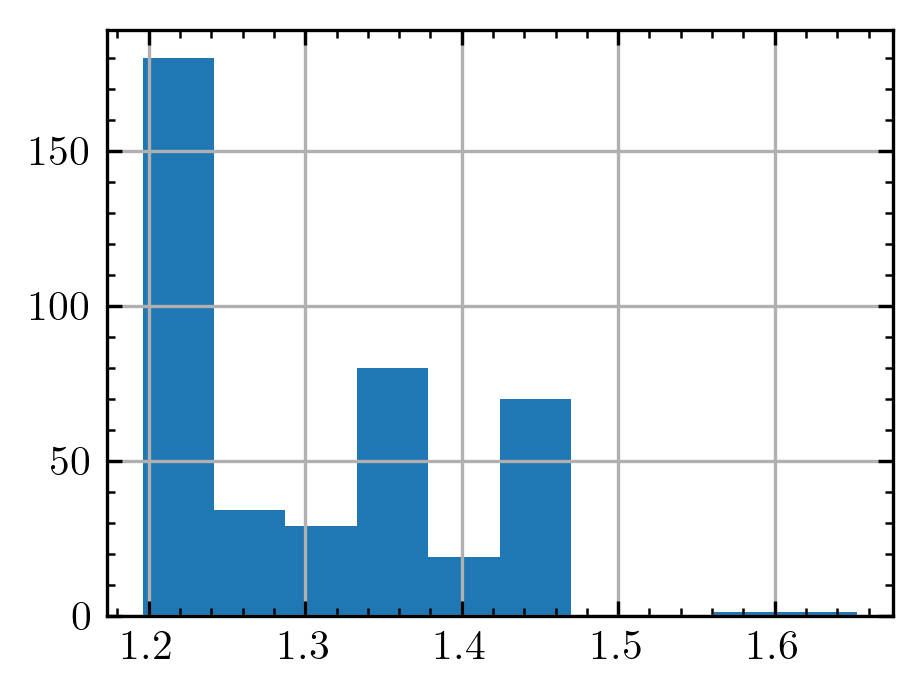

In [41]:
UCXBsV2['S1_mass'].hist()

In [42]:
UCXBs['state_f'].value_counts()

state_f
initial_RLOF    571
contact           9
Name: count, dtype: int64

In [43]:
UCXBs[initCols].describe()

,orbital_period_i,eccentricity_i,S2_mass_i,S2_log_R_i,S1_mass_i,S1_log_R_i
count,580.000000,580.0,580.000000,580.0,580.000000,580.0
mean,108.251700,0.0,6.638185,0.0,9.054131,0.0
std,331.830671,0.0,1.162722,0.0,3.078387,0.0
min,10.455539,0.0,4.941785,0.0,6.061236,0.0
25%,20.075500,0.0,5.881706,0.0,7.793741,0.0
50%,29.911661,0.0,6.267644,0.0,7.901605,0.0
75%,59.178604,0.0,7.181155,0.0,8.035413,0.0
max,3868.011916,0.0,9.972242,0.0,19.941306,0.0


In [44]:
XrBsFinal

,state_i,event_i,time_i,orbital_period_i,eccentricity_i,rl_relative_overflow_1_i,rl_relative_overflow_2_i,lg_mtransfer_rate_i,mass_transfer_case_i,step_names_i,...,interp_class_CO_HMS_RLO,interp_class_CO_HeMS,interp_class_CO_HeMS_RLO,mt_history_HMS_HMS,mt_history_CO_HMS_RLO,mt_history_CO_HeMS,mt_history_CO_HeMS_RLO,FAILED,WARNING,metallicity
binary_index,,,,,,,,,,,,,,,,,,,,,
5,detached,ZAMS,0.0,13.064247,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Last stable RLOF during postMS,NaN,NaN,NaN,0,0,1.0
78,detached,ZAMS,0.0,3.889990,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Last stable RLOF during stripped He star,NaN,NaN,NaN,0,0,1.0
155,detached,ZAMS,0.0,5.364604,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Last stable RLOF during postMS,NaN,NaN,NaN,0,0,1.0
261,detached,ZAMS,0.0,11.963675,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Last stable RLOF during postMS,NaN,NaN,NaN,0,0,1.0
333,detached,ZAMS,0.0,17.518876,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999453,detached,ZAMS,0.0,16.963075,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Last stable RLOF during postMS,NaN,NaN,NaN,0,0,1.0
999600,detached,ZAMS,0.0,9.741039,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Last stable RLOF during postMS,NaN,NaN,NaN,0,0,1.0
999858,detached,ZAMS,0.0,6.314032,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Last stable RLOF during postMS,NaN,NaN,NaN,0,0,1.0


In [45]:
UCXBs[finCols]

,orbital_period_f,eccentricity_f,state_f,S2_state_f,S2_mass_f,S2_log_R_f,S2_log_L_f,S1_state_f,S1_mass_f,S1_log_R_f,S1_log_L_f
binary_index,,,,,,,,,,,
333,0.032198,0.0,initial_RLOF,stripped_He_non_burning,1.202888,-0.674162,NaN,NS,1.266207,-4.745687,NaN
2183,0.040682,0.0,initial_RLOF,stripped_He_non_burning,1.285015,-0.666262,NaN,NS,1.264298,-4.745687,NaN
3207,0.051462,0.0,initial_RLOF,stripped_He_non_burning,2.607783,-0.431226,NaN,BH,2.775623,-4.928765,NaN
6045,0.032443,0.0,initial_RLOF,stripped_He_non_burning,1.222433,-0.668492,NaN,NS,1.298593,-4.745687,NaN
6589,0.034398,0.0,initial_RLOF,stripped_He_non_burning,1.778568,-0.584784,NaN,NS,1.285577,-4.745687,NaN
...,...,...,...,...,...,...,...,...,...,...,...
996448,0.037907,0.0,initial_RLOF,stripped_He_non_burning,1.215948,-0.675860,NaN,NS,1.286555,-4.745687,NaN
997494,0.038162,0.0,initial_RLOF,stripped_He_non_burning,1.145588,-0.690865,NaN,NS,1.264299,-4.745687,NaN
998166,0.038031,0.0,initial_RLOF,stripped_He_non_burning,1.807839,-0.583320,NaN,NS,1.286629,-4.745687,NaN


In [46]:
historyFinCols = ['S2_mass', 'S2_log_R', 'S1_mass', 'S1_log_R']

In [47]:
UCXBs['state_f'].value_counts()

state_f
initial_RLOF    571
contact           9
Name: count, dtype: int64

In [48]:
UCXBs[UCXBs['state_f'] == 'contact'][finCols]

,orbital_period_f,eccentricity_f,state_f,S2_state_f,S2_mass_f,S2_log_R_f,S2_log_L_f,S1_state_f,S1_mass_f,S1_log_R_f,S1_log_L_f
binary_index,,,,,,,,,,,
171031,0.000018,0.0,contact,NS,1.277584,-4.745687,NaN,WD,1.261091,-4.745687,NaN
197156,0.000018,0.0,contact,NS,1.277584,-4.745687,NaN,WD,1.257418,-4.745687,NaN
232710,0.000017,0.0,contact,NS,1.277584,-4.745687,NaN,WD,1.342922,-4.745687,NaN
381289,0.000018,0.0,contact,NS,1.277584,-4.745687,NaN,WD,1.188183,-4.745687,NaN
433619,0.000017,0.0,contact,NS,1.277584,-4.745687,NaN,WD,1.336957,-4.745687,NaN
744799,0.000019,0.0,contact,NS,1.277584,-4.745687,NaN,WD,1.161731,-4.745687,NaN
756407,0.000017,0.0,contact,NS,1.277584,-4.745687,NaN,WD,1.363588,-4.745687,NaN
921851,0.000020,0.0,contact,NS,1.277584,-4.745687,NaN,WD,1.048866,-2.387105,NaN
986048,0.000017,0.0,contact,NS,1.277584,-4.745687,NaN,WD,1.321377,-4.745687,NaN


In [49]:
UCXBs['orbital_period_f'].describe()

count    580.000000
mean       0.037812
std        0.007738
min        0.000017
25%        0.034874
50%        0.037365
75%        0.039489
max        0.065352
Name: orbital_period_f, dtype: float64

In [50]:
XrBsFinal[finCols].describe()

,orbital_period_f,eccentricity_f,S2_mass_f,S2_log_R_f,S2_log_L_f,S1_mass_f,S1_log_R_f,S1_log_L_f
count,10314.000000,10314.000000,10314.000000,10314.000000,9734.000000,10314.000000,10314.000000,0.0
mean,119.556193,0.764055,7.026555,0.524554,3.423873,1.550748,-4.753526,NaN
std,3078.376969,0.248943,2.265023,0.375116,0.461354,0.405738,0.044978,NaN
min,0.000017,0.000000,0.503199,-4.745687,1.404870,1.048866,-5.017371,NaN
25%,1.567227,0.686917,5.597155,0.474545,3.073521,1.277584,-4.745687,NaN
50%,3.141777,0.840923,7.090238,0.556006,3.430320,1.299853,-4.745687,NaN
75%,8.242150,0.938443,8.767195,0.652672,3.789866,1.732348,-4.745687,NaN
max,262873.300784,0.999991,12.850725,2.900400,5.330505,3.196783,-2.387105,NaN


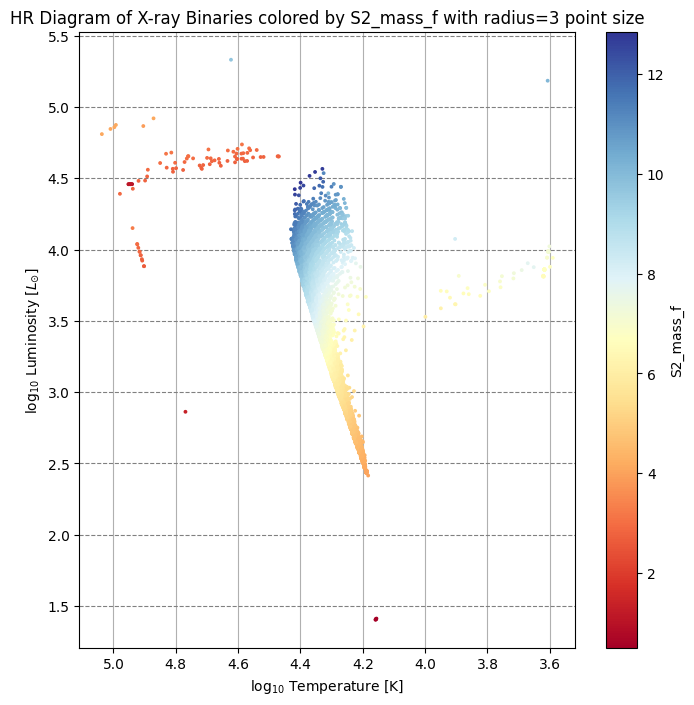

In [51]:
HR_Diagram(XrBsFinal, df_name = 'X-ray Binaries', grapher='plt', history=False, init_or_final='final', Star_Radius=3, variable='S2_mass_f')

In [52]:
UCXBs['S2_state_f'].value_counts()

S2_state_f
stripped_He_non_burning    571
NS                           9
Name: count, dtype: int64

In [53]:
UCXBs['S1_state_f'].value_counts()

S1_state_f
NS    542
BH     29
WD      9
Name: count, dtype: int64

In [54]:
UCXBsV2['S2_state'].value_counts()

S2_state
stripped_He_Core_He_burning        313
stripped_He_Central_He_depleted     84
WD                                  17
Name: count, dtype: int64

<Axes: >

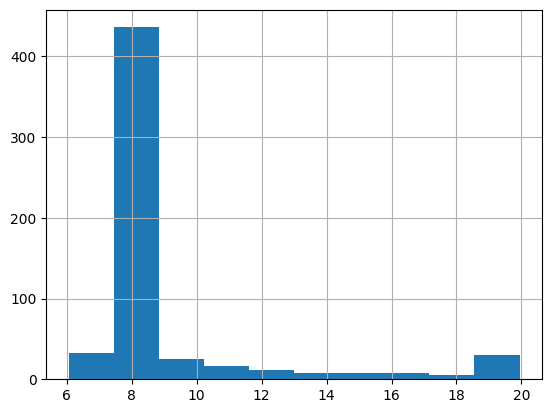

In [55]:
UCXBs['S1_mass_i'].hist()

In [56]:
UCXBs

,state_i,event_i,time_i,orbital_period_i,eccentricity_i,rl_relative_overflow_1_i,rl_relative_overflow_2_i,lg_mtransfer_rate_i,mass_transfer_case_i,step_names_i,...,interp_class_CO_HMS_RLO,interp_class_CO_HeMS,interp_class_CO_HeMS_RLO,mt_history_HMS_HMS,mt_history_CO_HMS_RLO,mt_history_CO_HeMS,mt_history_CO_HeMS_RLO,FAILED,WARNING,metallicity
binary_index,,,,,,,,,,,,,,,,,,,,,
333,detached,ZAMS,0.0,17.518876,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
2183,detached,ZAMS,0.0,21.494727,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
3207,detached,ZAMS,0.0,52.526829,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during postMS,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
6045,detached,ZAMS,0.0,22.520582,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
6589,detached,ZAMS,0.0,35.333872,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996448,detached,ZAMS,0.0,887.816353,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during postMS,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
997494,detached,ZAMS,0.0,21.097349,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
998166,detached,ZAMS,0.0,58.842648,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0


In [57]:
UCXBs[initCols]

,orbital_period_i,eccentricity_i,state_i,S2_state_i,S2_mass_i,S2_log_R_i,S1_state_i,S1_mass_i,S1_log_R_i
binary_index,,,,,,,,,
333,17.518876,0.0,detached,H-rich_Core_H_burning,6.001723,0.0,H-rich_Core_H_burning,7.856401,0.0
2183,21.494727,0.0,detached,H-rich_Core_H_burning,6.217695,0.0,H-rich_Core_H_burning,7.812865,0.0
3207,52.526829,0.0,detached,H-rich_Core_H_burning,9.729979,0.0,H-rich_Core_H_burning,19.322524,0.0
6045,22.520582,0.0,detached,H-rich_Core_H_burning,6.075719,0.0,H-rich_Core_H_burning,7.991980,0.0
6589,35.333872,0.0,detached,H-rich_Core_H_burning,7.333012,0.0,H-rich_Core_H_burning,7.867687,0.0
...,...,...,...,...,...,...,...,...,...
996448,887.816353,0.0,detached,H-rich_Core_H_burning,6.131611,0.0,H-rich_Core_H_burning,7.077017,0.0
997494,21.097349,0.0,detached,H-rich_Core_H_burning,5.821999,0.0,H-rich_Core_H_burning,7.821601,0.0
998166,58.842648,0.0,detached,H-rich_Core_H_burning,7.604671,0.0,H-rich_Core_H_burning,7.871972,0.0


In [59]:
UCXB_Indexes = UCXBs.index.to_list()

In [61]:
loadedpop.history[UCXB_Indexes][historyFinCols]

,S2_mass,S2_log_R,S1_mass,S1_log_R
binary_index,,,,
333,6.001723,0.000000,7.856401,0.000000
333,6.125674,0.715115,1.945359,1.535854
333,6.125674,0.715115,1.266153,-4.745687
333,6.379148,1.735810,1.266153,-4.745687
333,5.399492,1.327080,1.266207,-4.745687
...,...,...,...,...
999320,6.627629,1.828470,1.299925,-4.745687
999320,5.636198,1.424242,1.299971,-4.745687
999320,1.320975,-0.656906,1.299971,-4.745687


In [67]:
loadedpop.oneline[3]

,state_i,event_i,time_i,orbital_period_i,eccentricity_i,rl_relative_overflow_1_i,rl_relative_overflow_2_i,lg_mtransfer_rate_i,mass_transfer_case_i,step_names_i,...,interp_class_CO_HMS_RLO,interp_class_CO_HeMS,interp_class_CO_HeMS_RLO,mt_history_HMS_HMS,mt_history_CO_HMS_RLO,mt_history_CO_HeMS,mt_history_CO_HeMS_RLO,FAILED,WARNING,metallicity
binary_index,,,,,,,,,,,,,,,,,,,,,
3,detached,ZAMS,0.0,1.4985,0.0,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,Unstable contact phase,NaN,NaN,NaN,0,1,1.0


In [69]:
loadedpop.export_selection(selection=UCXB_Indexes, filename = '1e+00_Zsun_UCXB_subpop.h5', append=True)

posydon-popsyn setup ucxb_grid_params_v_2.ini --job_array=50 --walltime=24:00:00 --partition=ciera-std --account=b1094 --email=piersonlipschultz@gmail.com --mem_per_cpu=12G


bash slurm_submit.sh